# Lab 06 - Probability based learning

# Lab 06 - 基于概率的学习

计算概率，找到更好的决策


In this lab we are going to practise Naive Bayes and Bayesian networks. First let's import necessary libraries and a
dataset.

在这个实验中，我们将练习朴素贝叶斯网络和贝叶斯网络。首先，让我们导入必要的库和
数据集。

### Import libraries

In [1]:
import sys
sys.path
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn
import pygraphviz
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable, State, BayesianNetwork

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
dataset, target = datasets.load_iris(return_X_y=True)
dataset

X_train, X_test, y_train, y_test = train_test_split(dataset, target)

## 高斯朴素贝叶斯算法

sci-kit-learn包有一些naivebayes算法的实现。你可以在下面找到它们朴素的贝耶斯. 对于这个数据集，我们将使用高斯朴素贝叶斯算法。此算法用于数字特征的分类任务。它使用以下似然函数：

$$
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
$$

You can find the documentation for Gaussian Naive Bayes algorithm
[here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB).

In [4]:
gnb = GaussianNB()


现在我们要训练分类器。由于我们使用的是GaussianNB分类器，所以所有的特征都应该是数值特征。因此，如果你有分类数据，你必须使用一个编码器，并以数字格式编码。由于虹膜数据集只有4个数值特征，因此我们可以直接使用我们的数据集来训练分类器。

In [5]:
gnb.fit(X_train, y_train)

GaussianNB()

让我们用测试集来评估我们训练的朴素贝叶斯模型。

In [6]:
pred = gnb.predict(X_test)

print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### 任务1
* 使用您在实验室02和03中清理的数据集训练一个朴素的Bayes模型。使用适当的编码技术处理分类数据。
* 将数据分成以下每个百分比，并检查模型性能的变化。
    * 30%测试，70%训练
    * 40%测试，60%训练

## Bayesian Networks
## 贝叶斯网络

*This is optional and a little advanced exercise for students who like to invest more time on coding and
experimenting. This would require some extra reading on the part of the student.*

*这是一个可选的小高级练习，对于喜欢花更多时间在编码和做实验。这就需要学生多读一些书*

Bayesian networks are a powerful inference tool, in which
* a set of variables are represented as nodes
* an edge represents a dependence between the two variables

贝叶斯网络是一个强大的推理工具，其中
* 一组变量用节点表示
* 边表示两个变量之间的依赖关系

We will use pomegranate library to create Bayesian Network. Unfortunately, it is not installed along with Anaconda. So you have to install it to your python environment. You can use the installation instructions given here:

我们将使用pomegranate库创建贝叶斯网络。不幸的是，它没有和Anaconda一起安装。因此，必须将其安装到python环境中。您可以使用此处提供的安装说明：

https://pomegranate.readthedocs.io/en/latest/install.html

While Bayesian networks can have extremely complex emission probabilities - usually Gaussian or conditional Gaussian distributions - pomegranate currently supports only discrete Bayesian networks.

尽管贝叶斯网络可以有非常复杂的排放概率-通常是高斯或条件高斯分布-pomegranate目前只支持离散贝叶斯网络。


### The Monty hall problem
### 蒙蒂霍尔问题

The Monty Hall problem arose from the TV gameshow _Let's Make a Deal_, where a guest had to choose which one of three doors had a prize behind it. The twist was that after the guest chose, the host, originally Monty Hall, would then open one of the doors the guest **did not pick** and ask if the guest wanted to _switch_ the door they had picked. What should the guest do?

Monty Hall的问题源于电视游戏节目《让我们做个交易》，在这个游戏中，客人必须选择三个门中哪一个有奖品。问题是，在客人选择之后，主人，原来是蒙蒂大厅，会打开一扇客人**没有选的门**问客人是否想换一下他们选的门。客人应该怎么做？

#### Modeling the problem
### 建模问题
Let's try to solve it using bayesian networks. We need bayesian network with 3 nodes, one for guest, one for prize
and one for Monty(host).

让我们试着用贝叶斯网络来解决它。我们需要3个节点的贝叶斯网络，一个用于来宾，一个用于奖励，一个给蒙蒂（主持人）。

For a discrete (aka categorical) bayesian network we use DiscreteDistribution objects for the root nodes and
ConditionalProbabilityTable objects for the inner and leaf nodes.

对于离散（又名分类）贝叶斯网络，我们使用离散分布对象作为根节点和内部节点和叶节点的ConditionalProbabilityTable对象。

The door the guest initially chooses, and the door behind which the prize is, are completely random processes across the three doors. We can model these using Discrete distributions. A discrete distribution, made up of characters and their probabilities, assuming that these probabilities will sum to 1.0.

客人最初选择的门，以及奖品所在的门，完全是横跨三扇门的随机过程。我们可以用离散分布来建模。由字符及其概率组成的离散分布，假设这些概率之和为1.0。

In [7]:
# The guests initial door selection is completely random
# 客人最初选择的门完全是随机的
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

# The door the prize is behind is also completely random
# 奖品背后的门也是完全随机的
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})

The door which Monty opens is dependent on both the door the guest chooses (it cannot be the door the guest chooses),and the door the prize is behind (it cannot be the door with the prize behind it). We can model this using
Conditional probability tables. The columns in a ConditionalProbabilityTable correspond to the order in which the
parents (the second argument) are specified, and the last column is the value the ConditionalProbabilityTable itself takes.

蒙蒂打开的门取决于客人选择的门（不可能是客人选择的门）和奖品在后面的门（不可能是后面有奖品的门）。我们可以用条件概率表。ConditionalProbabilityTable中的列对应于指定了父级（第二个参数），最后一列是ConditionalProbabilityTable本身所接受的值。

In [8]:
# Monty is dependent on both the guest and the prize.
# 蒙蒂既依赖客人，也依赖奖品。
monty = ConditionalProbabilityTable(
        [[ 'A', 'A', 'A', 0.0 ],
         [ 'A', 'A', 'B', 0.5 ],
         [ 'A', 'A', 'C', 0.5 ],
         [ 'A', 'B', 'A', 0.0 ],
         [ 'A', 'B', 'B', 0.0 ],
         [ 'A', 'B', 'C', 1.0 ],
         [ 'A', 'C', 'A', 0.0 ],
         [ 'A', 'C', 'B', 1.0 ],
         [ 'A', 'C', 'C', 0.0 ],
         [ 'B', 'A', 'A', 0.0 ],
         [ 'B', 'A', 'B', 0.0 ],
         [ 'B', 'A', 'C', 1.0 ],
         [ 'B', 'B', 'A', 0.5 ],
         [ 'B', 'B', 'B', 0.0 ],
         [ 'B', 'B', 'C', 0.5 ],
         [ 'B', 'C', 'A', 1.0 ],
         [ 'B', 'C', 'B', 0.0 ],
         [ 'B', 'C', 'C', 0.0 ],
         [ 'C', 'A', 'A', 0.0 ],
         [ 'C', 'A', 'B', 1.0 ],
         [ 'C', 'A', 'C', 0.0 ],
         [ 'C', 'B', 'A', 1.0 ],
         [ 'C', 'B', 'B', 0.0 ],
         [ 'C', 'B', 'C', 0.0 ],
         [ 'C', 'C', 'A', 0.5 ],
         [ 'C', 'C', 'B', 0.5 ],
         [ 'C', 'C', 'C', 0.0 ]], [guest, prize])

Here ‘A’, ‘B’, ‘C’, represent the doors picked by the guest, prize door and the door picked by Monty respectively.

这里的“A”、“B”、“C”分别代表客人选的门、奖品门和蒙蒂选的门。

Now we have to create three nodes for the network using the above created distributions.

现在我们必须使用上面创建的分布为网络创建三个节点。

In [9]:
s1 = State(guest, name="guest")
s2 = State(prize, name="prize")
s3 = State(monty, name="monty")

Then we have to initialize a Bayesian network object. We can give it a meaningful name.

然后我们必须初始化一个贝叶斯网络对象。我们可以给它一个有意义的名字。

In [10]:
model = BayesianNetwork("Monty Hall Problem")

Let's add our three nodes to the graph.

让我们将三个节点添加到图中。

In [11]:
model.add_states(s1, s2, s3)

Now we have to add the edges to the model. Edges are added from parent to child. So second node should be the child
of the first node.

现在我们要向模型添加边。边从父对象添加到子对象。所以第二个节点应该是第一个节点的子节点。

In [12]:
model.add_edge(s1, s3)
model.add_edge(s2, s3)

To finalize the network creation we have to call the bake() method.

要完成网络创建，我们必须调用bake（）方法。

In [13]:
model.bake()

#### Predicting probabilities
#### 预测概率
We can calculate the probability of each scenario using the network we created. Let's calculate the probability of the following scenario - Guest initially said door A, Monty then opened door C, but the actual car was behind door B.

我们可以使用我们创建的网络计算每个场景的概率。让我们来计算以下场景的概率-客人最初说A门，蒙蒂随后打开C门，但实际的汽车在B门后面。

In [14]:
model.probability([['A', 'B', 'C']]) 

0.11111111111111109

Let's see the probability when guest chooses 'A', Monty chooses 'C' and the prize is in the same door that guest selected.

让我们看看客人选择“A”，蒙蒂选择“C”，奖品就在客人选择的同一扇门上的概率。

In [15]:
model.probability([['A', 'A', 'C']])

0.05555555555555554

#### Predicting Solution
#### 预测解

Let's say guest chooses door A.

假设客人选择A门。

In [16]:
model.predict_proba([['A', None, None]])

[array(['A',
        {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "A" : 0.3333333333333333,
             "B" : 0.3333333333333333,
             "C" : 0.3333333333333333
         }
     ],
     "frozen" : false
 },
        {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "B" : 0.49999999999999983,
             "A" : 0.0,
             "C" : 0.49999999999999983
         }
     ],
     "frozen" : false
 }], dtype=object)]

You can see that still the probability distribution over the price is same for all doors (0.33).
But Monty cannot choose gate A because guest opened it.

你可以看到，对于所有门，价格的概率分布仍然相同（0.33）。
客人不能选择门，因为门是开着的。

Let's say Monty chose door 'C', then what will be the new probability distribution for price.

假设蒙蒂选择了门“C”，那么价格的新概率分布是什么。

In [17]:
model.predict_proba([{'guest': 'A', 'monty': 'C'}])

[array(['A',
        {
     "class" : "Distribution",
     "dtype" : "str",
     "name" : "DiscreteDistribution",
     "parameters" : [
         {
             "A" : 0.3333333333333334,
             "B" : 0.6666666666666664,
             "C" : 0.0
         }
     ],
     "frozen" : false
 },
        'C'], dtype=object)]

So There is a 2/3rd change that the price is behind door B. So if the contestant chooses to change his/her pick,
he/she has twice the chance to win, compared to not changing the initial pick.

所以有2/3的变化是价格在B门之后。所以如果选手选择改变他/她的选择，
与不改变最初的选择相比，他/她有两倍的机会获胜。

### Task 2 (Optional)
### 任务2（可选）
Code the example in the slide 60 in Week 8 lecture and get the answer.

将第8周课程第60张幻灯片中的例子编码并得到答案。

# 任务1 - 朴素贝叶斯

## 0、引入依赖

## 1、读取lab03处理后的数据
- 只取连续型特征
- 空值填充 使用 均值填充和关联填充 结合

In [18]:
bands_df = pd.read_csv("lab03_bands.csv")
bands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           539 non-null    int64  
 1   grain screened       539 non-null    int64  
 2   paper type           539 non-null    int64  
 3   ink type             539 non-null    int64  
 4   type on cylinder     539 non-null    object 
 5   press type           539 non-null    int64  
 6   press                539 non-null    int64  
 7   unit number          539 non-null    float64
 8   paper mill location  539 non-null    int64  
 9   proof cut            539 non-null    float64
 10  viscosity            539 non-null    float64
 11  caliper              539 non-null    float64
 12  ink temperature      539 non-null    float64
 13  humifity             539 non-null    float64
 14  roughness            539 non-null    float64
 15  blade pressure       539 non-null    flo

### 2.清洗数据
- 删除分类数据列
- 使用lab03清洗过程

In [19]:
bands_target = bands_df['band type']
# 删除target
bands_df.drop('band type',axis=1,inplace=True)
# 删除object列
bands_df.drop(['Unnamed: 0'],axis=1,inplace=True)
# 'timestamp','job number'
bands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grain screened       539 non-null    int64  
 1   paper type           539 non-null    int64  
 2   ink type             539 non-null    int64  
 3   type on cylinder     539 non-null    object 
 4   press type           539 non-null    int64  
 5   press                539 non-null    int64  
 6   unit number          539 non-null    float64
 7   paper mill location  539 non-null    int64  
 8   proof cut            539 non-null    float64
 9   viscosity            539 non-null    float64
 10  caliper              539 non-null    float64
 11  ink temperature      539 non-null    float64
 12  humifity             539 non-null    float64
 13  roughness            539 non-null    float64
 14  blade pressure       539 non-null    float64
 15  varnish pct          539 non-null    flo

In [20]:
# 删除object的列
feature_list = bands_df.columns.tolist()
for feature in feature_list:
    if bands_df[feature].dtype == "object":
        bands_df.drop(feature,axis=1,inplace=True)
        pass

In [21]:
bands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grain screened       539 non-null    int64  
 1   paper type           539 non-null    int64  
 2   ink type             539 non-null    int64  
 3   press type           539 non-null    int64  
 4   press                539 non-null    int64  
 5   unit number          539 non-null    float64
 6   paper mill location  539 non-null    int64  
 7   proof cut            539 non-null    float64
 8   viscosity            539 non-null    float64
 9   caliper              539 non-null    float64
 10  ink temperature      539 non-null    float64
 11  humifity             539 non-null    float64
 12  roughness            539 non-null    float64
 13  blade pressure       539 non-null    float64
 14  varnish pct          539 non-null    float64
 15  press speed          539 non-null    flo

## 3、训练模型
- 编写成方法，将 test_size 作为参数
- 输出为预测准确度

In [22]:
def test_size_pred(test_size_num):
    X_train, X_test, y_train, y_test = train_test_split(bands_df, bands_target, test_size=test_size_num)
    bands_gnb = GaussianNB()
    bands_gnb.fit(X_train, y_train)
    pred = bands_gnb.predict(X_test)
    print("预测数据:%s；训练数据:%s\n"%(test_size_num,1-test_size_num))
    print(classification_report(y_pred=pred, y_true=y_test))
    print(metrics.accuracy_score(y_test, pred))

In [23]:
test_size_num_list = []
accuracy_score_list = []
test_size_num = 0.05
while test_size_num < 1:
    X_train, X_test, y_train, y_test = train_test_split(bands_df, bands_target, test_size=test_size_num)
    bands_gnb = GaussianNB()
    bands_gnb.fit(X_train, y_train)
    pred = bands_gnb.predict(X_test)
    test_size_num_list.append(test_size_num)
    accuracy_score_list.append(metrics.accuracy_score(y_test, pred))
    test_size_num = test_size_num + 0.05

## 4、可视化
- 利用循环生成多个模型
- 将不同模型的结果准确度及参数可视化展示

Text(0, 0.5, 'Accuracy')

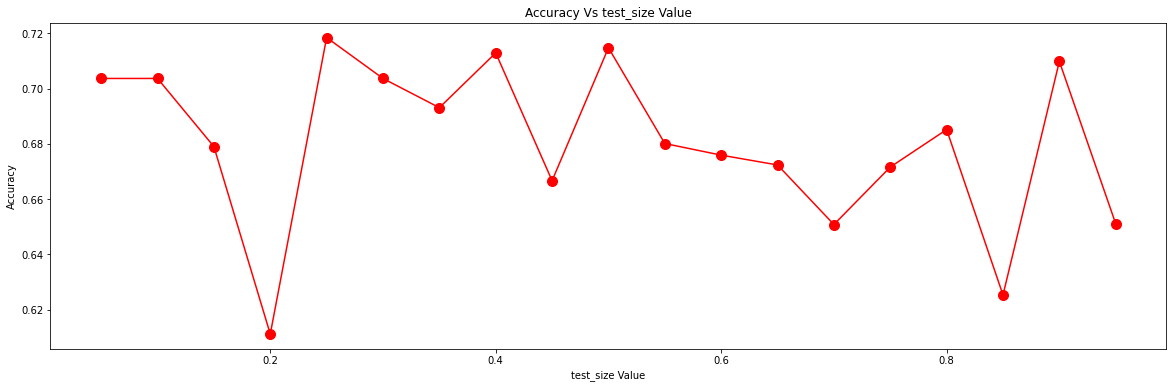

In [24]:
plt.figure(figsize=(20, 6))
plt.plot(test_size_num_list, accuracy_score_list, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs test_size Value')
plt.xlabel('test_size Value')
plt.ylabel('Accuracy')